<a href="https://colab.research.google.com/github/anggello-anteliz09/pythonAnalisisPPA/blob/main/PPAclimaPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

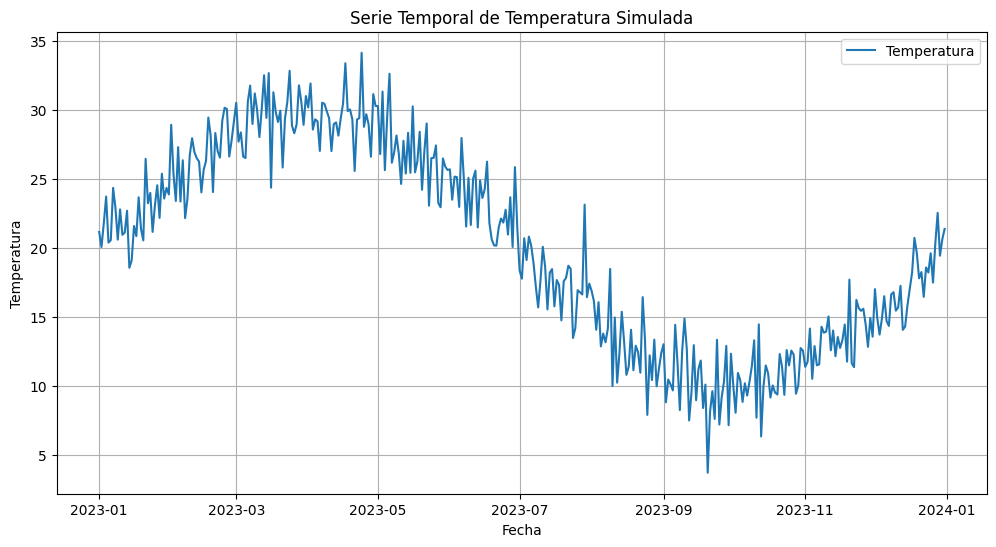

<Figure size 1200x800 with 0 Axes>

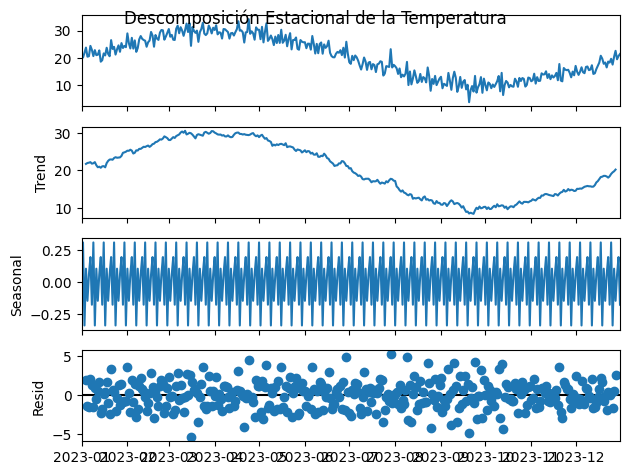

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


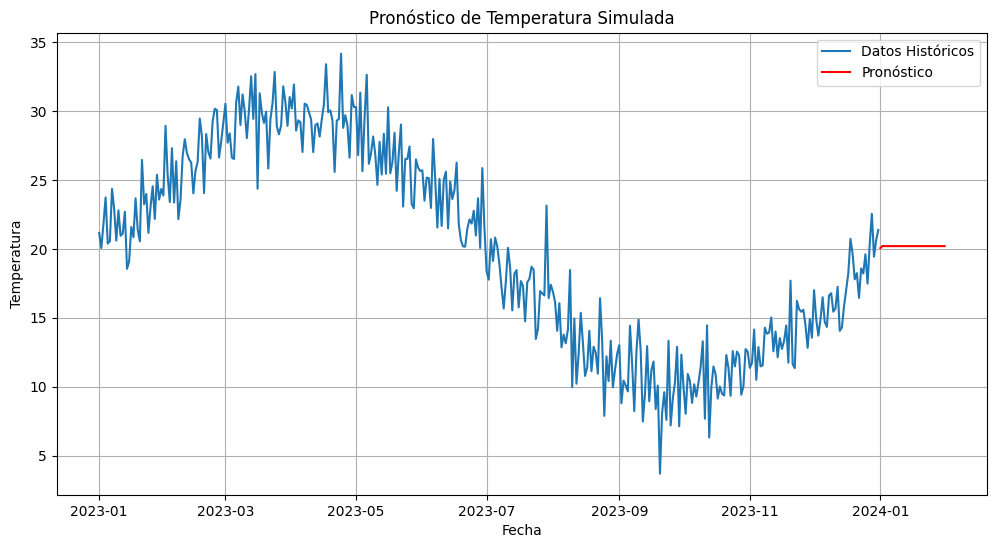

Error cuadrático medio (MSE): 2.9818273517256406


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


np.random.seed(42)
fecha = pd.date_range(start='2023-01-01', periods=365, freq='D')
temperatura = 20 + 10 * np.sin(2 * np.pi * fecha.dayofyear / 365) + np.random.normal(0, 2, len(fecha))


datos_climaticos = pd.DataFrame({'Fecha': fecha, 'Temperatura': temperatura})
datos_climaticos.set_index('Fecha', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(datos_climaticos, label='Temperatura')
plt.title('Serie Temporal de Temperatura Simulada')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()


resultados_descomposicion = seasonal_decompose(datos_climaticos, model='additive')
plt.figure(figsize=(12, 8))
resultados_descomposicion.plot()
plt.suptitle('Descomposición Estacional de la Temperatura')
plt.show()


modelo_arima = ARIMA(datos_climaticos, order=(1, 1, 1))
resultado_modelo = modelo_arima.fit()


pronostico = resultado_modelo.predict(start=len(datos_climaticos), end=len(datos_climaticos) + 30, typ='levels')


plt.figure(figsize=(12, 6))
plt.plot(datos_climaticos, label='Datos Históricos')
plt.plot(pronostico, label='Pronóstico', color='red')
plt.title('Pronóstico de Temperatura Simulada')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.show()


predicciones = resultado_modelo.predict(start=len(datos_climaticos) - 30, end=len(datos_climaticos) - 1, typ='levels')
mse = mean_squared_error(datos_climaticos[-30:], predicciones)
print(f'Error cuadrático medio (MSE): {mse}')
